# Проект. Исследование стартапов


- Автор: Алена Свиридова (GitHub - AlenaAnalyst)

## Введение

### Цели и задачи проекта

Понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний.

Подготовить датасет к работе, исследовать динамику и структуру финансирования стартапов, дать выводы и рекомендации, куда и каким образом целесообразно инвестировать.

### Описание данных

Датасеты:

cb_investments.csv - Содержит информацию о компаниях и состоявшемся финансировании (54294 строк 40 столбцов)

cb_returns.csv - Содержит информацию об объёмах возвратов по годам и типам финансирования в миллионах долларов (15 строк 14 столбцов)

### Содержимое проекта
   1. [Знакомство с данными: загрузка и предобработка](#1-bullet)
   2. [Инжиниринг признаков](#2-bullet)
   3. [Работа с выбросами и анализ](#3-bullet)
   4. [Анализ динамики](#4-bullet)
   5. [Итоговый вывод и рекомендации](#5-bullet)

<a class="anchor" id="1-bullet"></a>
## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.


**ПОЯСНЕНИЯ:**

seed — сумма инвестиций, вложенных на посевной стадии развития проекта (стадия идеи, когда компания только формируется, проводятся первичные исследования и разработки).

venture — сумма венчурных инвестиций (финансирование инновационных проектов с высоким риском, но и потенциалом высокой доходности; обычно предоставляется на ранних стадиях развития стартапов).

equity_crowdfunding — сумма, привлечённая через долевой краудфандинг (сбор средств от большого числа инвесторов, которые в обмен получают долю в проекте/компании).

undisclosed — сумма финансирования нераскрытого типа (источники или условия инвестиций не разглашаются; может включать частные договорённости или конфиденциальные сделки).

convertible_note — сумма инвестиций через конвертируемые займы (инвестор даёт деньги взаймы с условием, что в будущем займ может быть конвертирован в акции компании — например, при следующем раунде финансирования).

debt_financing — сумма долгового финансирования (заёмные средства, которые компания обязана вернуть с процентами; например, банковские кредиты или облигации).

angel — сумма инвестиций от бизнес-ангелов (частные инвесторы, финансирующие стартапы на ранних стадиях, часто совмещая финансовую поддержку с менторством).

grant — сумма полученных грантов (безвозмездное финансирование от государственных или частных фондов, обычно под определённые цели — исследования, социальные проекты и т. д.).

private_equity — сумма инвестиций в виде прямых (частных) вложений (капиталовложения от фондов прямых инвестиций или крупных инвесторов напрямую в компанию, обычно с целью долгосрочного владения).

post_ipo_equity — сумма финансирования, привлечённая после IPO (первичного размещения акций на бирже) в форме долевого участия (например, дополнительные выпуски акций).

post_ipo_debt — сумма долгового финансирования, полученного после IPO (кредиты, облигации и другие долговые инструменты, выпущенные после выхода компании на биржу).

secondary_market — сумма сделок на вторичном рынке (операции с уже выпущенными акциями, облигациями или другими ценными бумагами, которые происходят после первичного размещения — например, торговля акциями на бирже).

product_crowdfunding — сумма, привлечённая через продуктовый краудфандинг (финансирование за счёт предзаказов или пожертвований на создание конкретного продукта; инвесторы не получают долю в компании, а становятся первыми покупателями или получают бонусы).

round_A — round_H — суммы инвестиций, привлечённые в соответствующих раундах финансирования (раунды обозначают этапы привлечения капитала: A, B, C и далее — каждый раунд обычно связан с определённым этапом развития компании и увеличением её оценки).


### 1.1. Вывод общей информации

In [1]:
#!pip install phik

In [2]:
#import phik as phik
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, Markdown, HTML

In [3]:
df = pd.read_csv("**/cb_investments.zip", sep=';', low_memory=False)
df_returns = pd.read_csv('**/cb_returns.csv')

In [4]:
# Начальное кол-во строк
begin_num_entries = df.shape[0]

In [5]:
# Столбцы финансирования
funding_cols = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity', 
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,NaN,NaN,1785.0,2014-05-15,NaN,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,NaN,NaN,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,NaN,NaN,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,NaN,NaN,1826.0,2014-01-14,NaN,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df_returns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


In [9]:
df_returns.head(15)

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.00,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.00,0.20,0.00
1,2001,2.88,23.49,0.00,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.00,0.46,0.00
2,2002,6.59,209.42,0.00,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.00,0.06,0.00
3,2003,7.74,233.86,0.00,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.00,0.08,0.00
4,2004,9.93,555.90,0.00,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.00,0.55,0.00
5,2005,26.60,2628.92,0.00,9.51,0.02,35.09,31.06,0.0,2.40,3.51,0.00,0.05,0.00
6,2006,61.81,3100.18,0.19,46.74,1.78,113.21,47.75,0.0,16.67,20.58,0.00,0.12,0.00
7,2007,70.41,3585.37,0.01,55.37,3.22,125.68,164.51,0.0,88.81,24.36,0.00,0.57,0.00
8,2008,89.72,2717.02,0.03,41.02,1.71,397.54,102.83,0.0,130.38,84.28,0.00,0.47,0.00
9,2009,160.21,2501.29,0.18,37.50,2.25,394.10,97.21,0.0,203.70,76.76,0.00,0.12,0.02


**Выводы:**

cb_investments.csv содержит 54294, однако заполнено ~49438. Выяснить причину.

У двух столбцов(market funding_total_usd) в названии есть пробелы - исправить.

В столбце market удалить: 'пробелы' '&' '+'

У столбца region присутствуют значения с пометкой - Other. Выяснить что это.

founded_at тип на date.

cb_returns.csv содержит 15 строк, информацию за 2000-2014 года

Изменить тип: funding_total_usd на числовой

Если есть дата основания то должны быть и след 3 столбца (founded_month founded_quarter	founded_year)

### 1.2. Предобработка данных

Проверим названия столбцов в датасетах

In [10]:
df = df.rename(columns={' market ' : 'market', ' funding_total_usd ' : 'funding_total_usd'})
df = df.rename(columns={'round_A' : 'round_a',
                        'round_B' : 'round_b',
                        'round_C' : 'round_c',
                        'round_D' : 'round_d',
                        'round_E' : 'round_e',
                        'round_F' : 'round_f',
                        'round_G' : 'round_g',
                        'round_H' : 'round_h'
                       })

Уберем в столбце `funding_total_usd` выделение разрядов и приведем его к числовому типу.

In [11]:
df['funding_total_usd']=df['funding_total_usd'].str.replace(',','',regex=False)
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'], errors='coerce',downcast='float')

Обработаем типы данных в столбцах, которые хранят значения даты и времени

In [12]:
df[df['founded_at'] < '1672-12-21']

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,1.0,NaN,1636-09-08,NaN,NaN,1636.0,2014-01-06,NaN,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Одну строку мы не сможем сделать датой, сначала заполним для нее колонки founded_month	founded_quarter

In [13]:
# Заполняем 0-ую строку
df['founded_month'][0] = float(df['founded_at'][0][5:7]) # Вычислим месяц для нее
df['founded_quarter'][0] = float(((df['founded_month'][0] - 1) // 3) + 1) # Вычислим квартал для нее 

/tmp/ipykernel_249/2607703109.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['founded_month'][0] = float(df['founded_at'][0][5:7]) # Вычислим месяц для нее
/tmp/ipykernel_249/2607703109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['founded_quarter'][0] = float(((df['founded_month'][0] - 1) // 3) + 1) # Вычислим квартал для нее


In [14]:
df['founded_at']=pd.to_datetime(df['founded_at'], errors='coerce')
# first_funding_at mid_funding_at last_funding_at
df['first_funding_at']=pd.to_datetime(df['first_funding_at'], errors='coerce')
df['mid_funding_at']=pd.to_datetime(df['mid_funding_at'], errors='coerce')
df['last_funding_at']=pd.to_datetime(df['last_funding_at'], errors='coerce')

In [15]:
# Заполним только пустые строки
df['founded_month'] = df['founded_month'].fillna(df['founded_at'].dt.month)
df['founded_quarter'] = df['founded_quarter'].fillna(df['founded_at'].dt.quarter)

In [16]:
df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,1.0,NaN,NaT,9.0,3.0,1636.0,2014-01-06,NaT,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,2000000.0,operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,1.0,1.0,1785.0,2014-05-15,NaT,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,7.0,3.0,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,1.0,1.0,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,1.0,1.0,1826.0,2014-01-14,NaT,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  49437 non-null  object        
 1   homepage_url          45989 non-null  object        
 2   category_list         45477 non-null  object        
 3   market                45477 non-null  object        
 4   funding_total_usd     40907 non-null  float32       
 5   status                48124 non-null  object        
 6   country_code          44165 non-null  object        
 7   state_code            30161 non-null  object        
 8   region                44165 non-null  object        
 9   city                  43322 non-null  object        
 10  funding_rounds        49438 non-null  float64       
 11  participants          30473 non-null  float64       
 12  founded_at            38553 non-null  datetime64[ns]
 13  founded_month   

В датасете `cb_returns` сделайем столбец `year` индексом всего датасета

In [18]:
df_returns = df_returns.set_index('year')

Обработаем текстовые данные.

In [19]:
df['market'] = df['market'].astype(str).str.strip()

Обработаем полные дубликаты в данных и пропуски в `funding_total_usd`.

In [20]:
# Найдем количество пустых строк
df[df['name'].isna() & df['homepage_url'].isna() & df['category_list'].isna()  & df['funding_total_usd'].isna() & df['status'].isna() & df['country_code'].isna() & df['state_code'].isna()].shape

(4856, 40)

In [21]:
# Удалим пустые строки
df.dropna(subset=['name','homepage_url','category_list','funding_total_usd','status','country_code','state_code'],how='all', inplace=True)

In [22]:
df.shape

(49438, 40)

In [23]:
# Не содержат данных о финансировании
cols = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding',
    'round_a', 'round_b', 'round_c', 'round_d', 'round_e', 'round_f',
    'round_g', 'round_h'
]
delete = df[df['funding_total_usd'].isna() & (df[cols] == 0).all(axis=1)]
delete.shape

(8531, 40)

In [24]:
# Удалим строки без данных о финансировании
df = df.drop(delete.index)
df.shape

(40907, 40)

In [25]:
# Удалим явные дубликаты
delete = (df.duplicated())
df = df[~delete]
df.shape

(40907, 40)

Заполним пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. 

In [26]:
# Заполним только пустые строки
df['mid_funding_at'] = df['mid_funding_at'].fillna(df['first_funding_at'] + (df['last_funding_at'] - df['first_funding_at'])/2)

In [27]:
# В first_funding_at есть пустое значение, которое можно восстановить обратным способом (оно одно, но сделаем это)
df['first_funding_at'] = df['first_funding_at'].fillna(df['last_funding_at'] - (df['last_funding_at'] - df['mid_funding_at'])*2)

In [28]:
print("Количество пустых значений в mid_funding_at: ", df['mid_funding_at'].isna().sum())
print("Количество пустых значений в first_funding_at: ", df['first_funding_at'].isna().sum())

Количество пустых значений в mid_funding_at:  1
Количество пустых значений в first_funding_at:  1


In [29]:
df = df.drop(df[(df['mid_funding_at'].isna())&(df['first_funding_at'].isna())].index)

Оценим полноту данных

In [30]:
# Заменим строки на пустое значение для подсчета пропусков
df['market'][df['market']=='nan'] = np.NaN

/tmp/ipykernel_249/1783832305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['market'][df['market']=='nan'] = np.NaN


In [31]:
# Таблица с количеством и долей пропусков по каждому столбцу
nan_count = df.isna().sum().to_frame('Количество пропусков')
nan_count['Доля пропусков'] = (df.isna().mean() * 100).round(2)

# Отсортируем по доле пропусков
nan_count = nan_count.sort_values(by='Доля пропусков', ascending=False)

display(nan_count)

,Количество пропусков,Доля пропусков
state_code,15287,37.37
participants,13575,33.19
founded_at,8707,21.29
founded_month,8706,21.28
founded_year,8706,21.28
founded_quarter,8706,21.28
city,4505,11.01
country_code,3819,9.34
region,3819,9.34
market,2503,6.12


In [32]:
print("Удалено строк: ", begin_num_entries-df.shape[0])

Удалено строк:  13388


In [33]:
print("Доля удаленных строк: ", round((begin_num_entries-df.shape[0])/begin_num_entries,2))

Доля удаленных строк:  0.25


**Доля удаленных кажется ощутимой, но это все были пустые строки.**

**Теперь пропусков значительно меньше. Только даты основания компаний и код региона остается со значительным количеством пропусков.**

<a class="anchor" id="2-bullet"></a>
## Шаг 2. Инжиниринг признаков

### 2.1. Группы по срокам финансирования

Разделим все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

In [34]:
# Заполним значение по умолчанию
df['group'] = 'нет группы'

# Группа Единичное финансирование
df.loc[df['funding_rounds'] == 1, 'group'] = 'Единичное финансирование'

# Группа Срок финансирования до года
mask = (df['funding_rounds'] > 1) & ((df['last_funding_at'] - df['first_funding_at']) < pd.Timedelta(days=365))
df.loc[mask, 'group'] = 'Срок финансирования до года'

# Группа Срок финансирования более года
mask = (df['funding_rounds'] > 1) & ((df['last_funding_at'] - df['first_funding_at']) >= pd.Timedelta(days=365))
df.loc[mask, 'group'] = 'Срок финансирования более года'

In [35]:
df_categorys = df.groupby('group').agg(Количество=('market','count'),Сумма_инвестиций=('funding_total_usd','sum') )
df_categorys

,Количество,Сумма_инвестиций
group,,
Единичное финансирование,21910,1.993044e+11
Срок финансирования более года,12223,4.037394e+11
Срок финансирования до года,4270,4.787355e+10


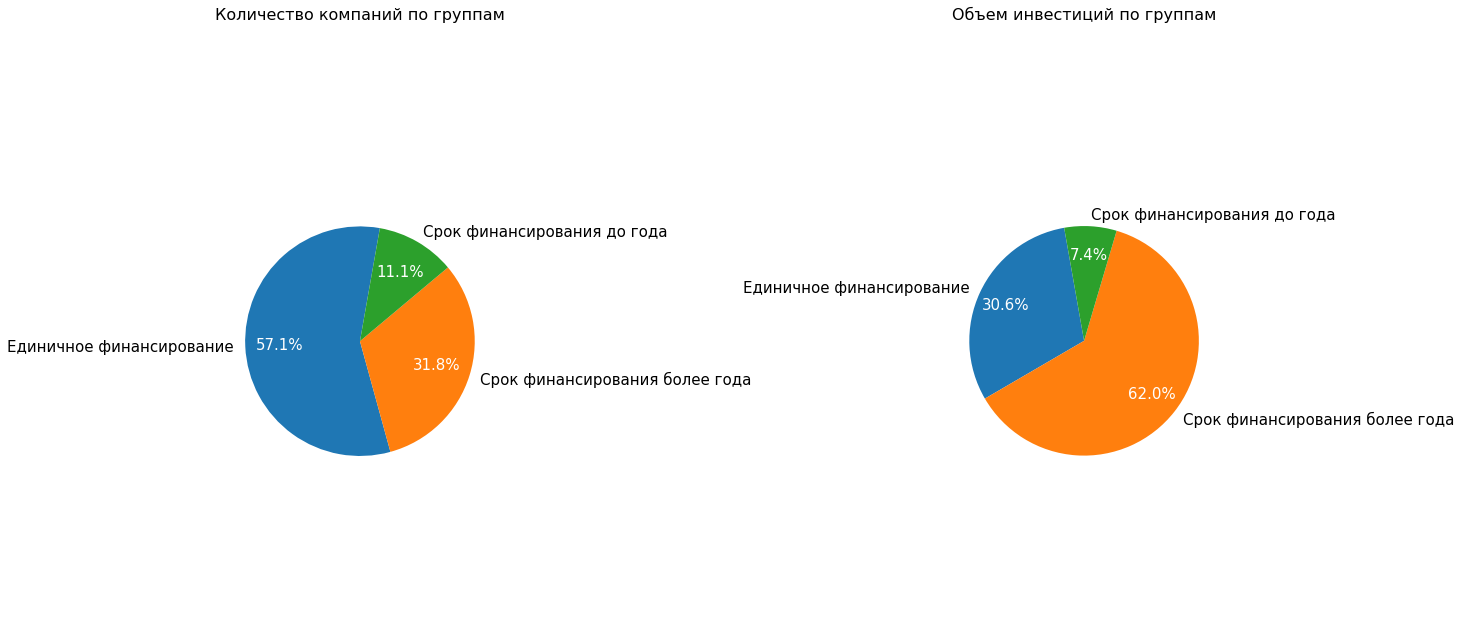

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(20, 9))

# Первый график
wedges, texts, autotexts = axs[0].pie(
    df_categorys['Количество'],
    labels=df_categorys.index,
    autopct='%1.1f%%',
    startangle=80,
    textprops={'fontsize': 15},
    pctdistance=0.7
)
for autotext in autotexts:
    autotext.set_color('white')
axs[0].set_title('Количество компаний по группам', fontsize=16, pad=30)
axs[0].axis('equal')

# Второй график
wedges, texts, autotexts = axs[1].pie(
    df_categorys['Сумма_инвестиций'],
    labels=df_categorys.index,
    autopct='%1.1f%%',
    startangle=100,
    textprops={'fontsize': 15},
    pctdistance=0.75
)
for autotext in autotexts:
    autotext.set_color('white')
axs[1].set_title('Объем инвестиций по группам', fontsize=16, pad=30)
axs[1].axis('equal')

plt.tight_layout()
plt.show()

**Компании с единичным финансированием составляют большинство по числу, но не по объёму вложений**

**Долгосрочные инвестиции доминируют по объёму, несмотря на меньшую долю в количестве**

**Как по количеству, так и по объёму, проекты со сроком финансирования до года занимают незначительное место**

### 2.2 Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитаем, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесем к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесем к средним, а сегменты до 35 компаний отнесем к нишевым.

In [37]:
# Считаем кол-во через оконную фук-ю
df['market_count'] = df.groupby('market')['market'].transform('count')

def categorize(count):
    if count > 120:
        return 'массовый'
    elif 35 <= count <= 120:
        return 'средний'
    else:
        return 'нишевый'
# Присваиваем название группы
df['market_group'] = df['market_count'].apply(categorize)

segment_count_in_group = df.groupby('market_group')['market'].nunique()
display(segment_count_in_group)

market_group
массовый     48
нишевый     289
средний      57
Name: market, dtype: int64

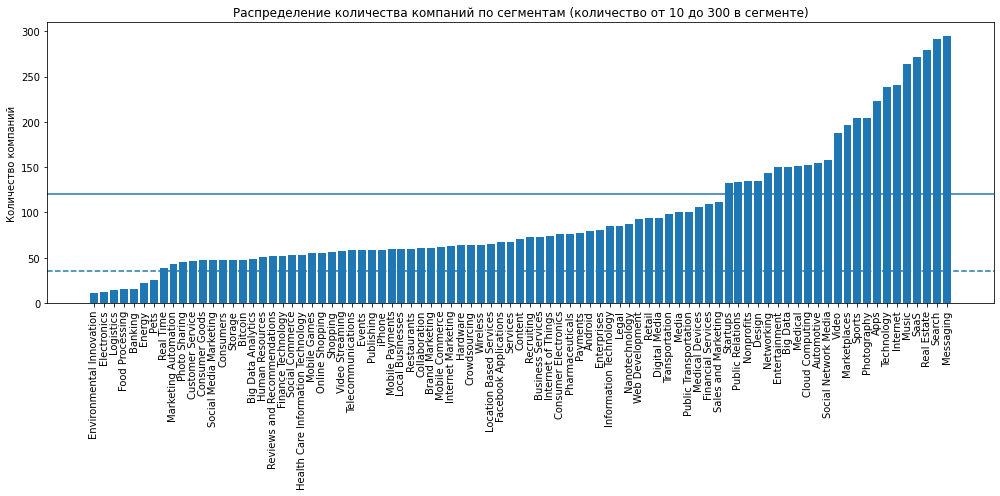

In [38]:
# Считаем сколько компаний в каждом сегменте
segment_counts = df.groupby('market')['market'].count().sort_values()
segment_counts1 = segment_counts[(segment_counts > 10) & (segment_counts < 300)]

plt.figure(figsize=(14, 7))
plt.bar(segment_counts1.index, segment_counts1.values)

# Линии показывающие границы сегментов
plt.axhline(35, linestyle='--')
plt.axhline(120, linestyle='-')

plt.title('Распределение количества компаний по сегментам (количество от 10 до 300 в сегменте)')
plt.ylabel('Количество компаний')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

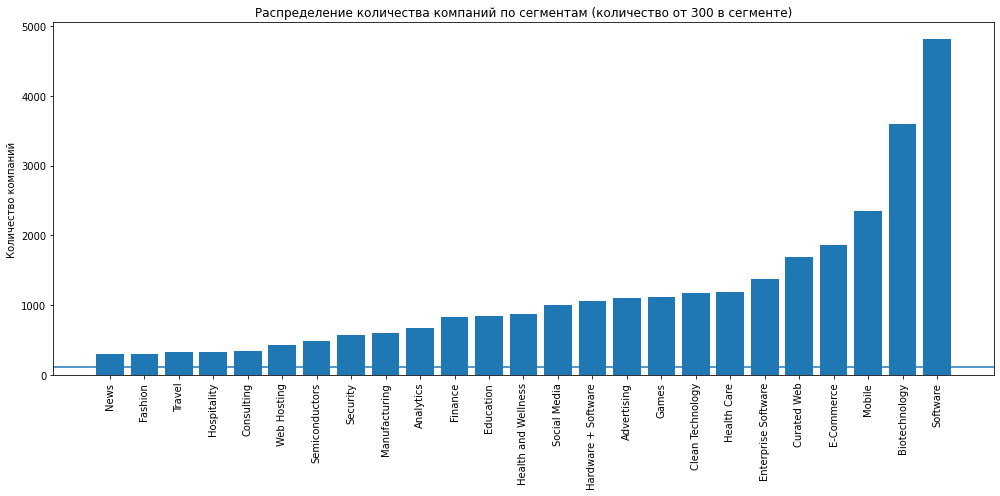

In [39]:
# Считаем сколько компаний в каждом сегменте
segment_counts2 = segment_counts[segment_counts >= 300]

plt.figure(figsize=(14, 7))
plt.bar(segment_counts2.index, segment_counts2.values)

# Линии показывающие границы сегментов
#plt.axhline(35, linestyle='--')
plt.axhline(120, linestyle='-')

plt.title('Распределение количества компаний по сегментам (количество от 300 в сегменте)')
plt.ylabel('Количество компаний')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Оставим в столбце `market` только массовые сегменты. Для остальных сегментов заменим значения на заглушки — `niche` для нишевых и `mid` для средних.

In [40]:
df.loc[df['market_group'] == 'средний', 'market'] = 'mid'
df.loc[df['market_group'] == 'нишевый', 'market'] = 'niche'

df = df.drop(columns=['market_group','market_count'])

df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,group
0,Harvard University,http://harvard.edu,|Education|,Education,90000000.0,operating,USA,MA,Boston,Cambridge,1.0,NaN,NaT,9.0,3.0,1636.0,2014-01-06,2014-01-06,2014-01-06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование
1,University of New Brunswick,http://www.unb.ca,NaN,niche,2000000.0,operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,1.0,1.0,1785.0,2014-05-15,2014-05-15,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,mid,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,7.0,3.0,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,1.0,1.0,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Срок финансирования до года
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,1.0,1.0,1826.0,2014-01-14,2014-01-14,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование


**Нишевой категории принадлежит настолько много сегментов, что даже на графике рассмотреть их не представляется возможным.**

**Поэтому мы опускаем их объединяя в один сегмень, со средним та же история.**

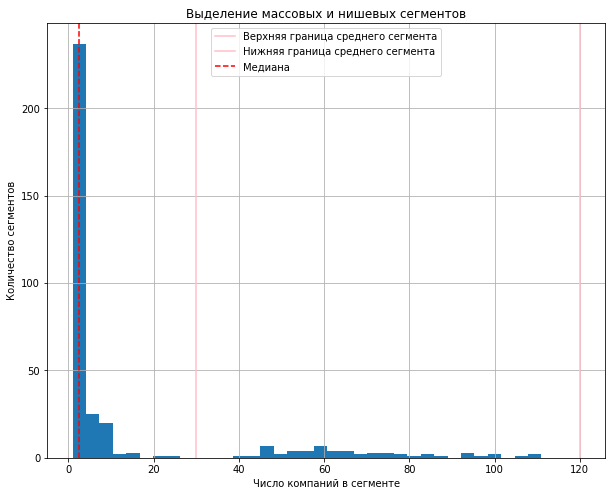

In [41]:
segment_counts1 = segment_counts[segment_counts < 120]

plt.figure(figsize=(10, 8))
plt.hist(segment_counts1, bins=35)
plt.axvline(120, linestyle='-', color = 'pink', label='Верхняя граница среднего сегмента')
plt.axvline(30, linestyle='-', color = 'pink', label='Нижняя граница среднего сегмента')
plt.axvline(segment_counts.median(), linestyle='--', color = 'red', label='Медиана')
plt.title('Выделение массовых и нишевых сегментов')
plt.xlabel('Число компаний в сегменте')
plt.ylabel('Количество сегментов')
plt.legend()
plt.grid(True)
plt.show()

<a class="anchor" id="3-bullet"></a>
## Шаг 3. Работа с выбросами и анализ

### 3.1. Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

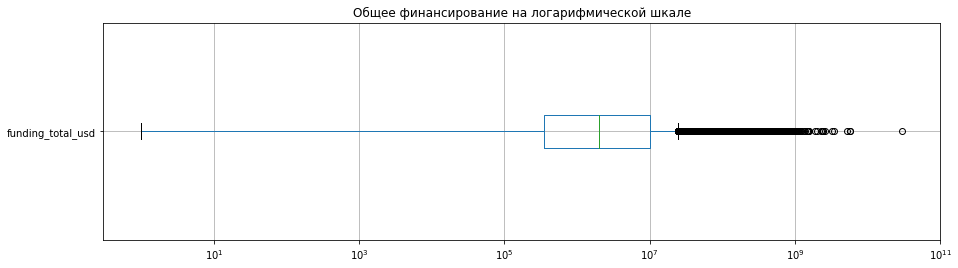

In [42]:
# На простом графике ничего не видно - изменим меру имерения оси Х на логарифмы
df.boxplot(column='funding_total_usd',vert=False, figsize=(15, 4))
plt.xscale('log')
plt.title('Общее финансирование на логарифмической шкале')
plt.show()

In [43]:
# Посмотрим типичные значения распределения финансирования
stats = df['funding_total_usd'].describe()

print(stats)
print("Типичный (медиана) размер общего финансирования: ",stats['50%']," USD")

q1 = df['funding_total_usd'].quantile(0.25)
q3 = df['funding_total_usd'].quantile(0.75)

print("Типичный диапазон: от ",q1," до ",q3," USD")

count    4.090600e+04
mean     1.591252e+07
std      1.686808e+08
min      1.000000e+00
25%      3.500000e+05
50%      2.000000e+06
75%      1.000000e+07
max      3.007950e+10
Name: funding_total_usd, dtype: float64
Типичный (медиана) размер общего финансирования:  2000000.0  USD
Типичный диапазон: от  350000.0  до  10000000.0  USD


**Большая часть компаний получают относительно небольшие суммы 2 млн USD(медиана), однако есть несколько компаний с очень крупным объемом финансирования. На это указывает Среднее значение превышающее медиану в 8 раз - ассиметричное распределение.**

**Типичные значения лежат в диапазоне от 0.35 до 10 млн USD.**

Определим компании с аномальным объёмом общего финансирования.  
Определим сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведим топ таких сегментов.

In [44]:
# Функ-я определяет выброс ли это
def flag_outliers(group, q1_f, q3_f):
    iqr = q3_f - q1_f
    low = q1_f - 1.5 * iqr
    high = q3_f + 1.5 * iqr
    group['is_outlier'] = (group['funding_total_usd'] < low) | (group['funding_total_usd'] > high)
    return group

df = df.groupby('market', group_keys=False).apply(flag_outliers, q1_f=q1, q3_f=q3)

In [45]:
# Считаем долю выбросов в каждом сегменте
segment_stats = df.groupby('market').agg(Доля_выбросов = ('is_outlier', 'mean'), Количество = ('is_outlier','count')).sort_values('Доля_выбросов', ascending=False)
segment_stats['Доля_выбросов'] = segment_stats['Доля_выбросов'].round(2)

display(Markdown("<center><h3> Топ‑10 сегментов с наибольшей долей компаний, получивших аномальное финансирование</h3></center>"))
html_str = segment_stats.head(10).to_html() # Markdown не может вывести объект как таблицу - сделаем HTML объект для вывода по центру
display(HTML(f"<center>{html_str}</center>"))

<center><h3> Топ‑10 сегментов с наибольшей долей компаний, получивших аномальное финансирование</h3></center>

,Доля_выбросов,Количество
market,,
Semiconductors,0.32,484
Clean Technology,0.28,1180
Health Care,0.27,1185
Web Hosting,0.26,424
Technology,0.25,238
Biotechnology,0.23,3590
Security,0.17,567
Cloud Computing,0.16,152
Enterprise Software,0.16,1381


### 3.2 Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверим по датасету, можно ли считать, что нам предоставили полные данные за 2014 год. Затем исключим из датасета компании, получившие аномальное финансирование.

In [46]:
# Проверяем покрытие всех месяцев 2014 года
df_2014 = df[df['founded_year'] == 2014]

months_present = df_2014['founded_month'].unique()
df_2014.groupby('founded_month')['name'].count()

founded_month
2014-01    414
2014-02    110
2014-03    115
2014-04     98
2014-05     81
2014-06     73
2014-07     46
2014-08     31
2014-09     26
2014-10     16
2014-11      3
2014-12      2
Name: name, dtype: int64

In [47]:
df_no_outliers = df[df['is_outlier'] == False].copy()

In [48]:
# Считаем кол-во раундов по годам
rounds_per_year = df_no_outliers.groupby('founded_year')['funding_rounds'].sum() 
# Оставляем года >=50 раундов
years_with_50_plus = rounds_per_year[rounds_per_year >= 50].index
# Оставляем нужные компании в датасете
df_final = df_no_outliers[df_no_outliers['mid_funding_at'].dt.year.isin(years_with_50_plus)].copy() 

In [49]:
df_final.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,participants,founded_at,founded_month,founded_quarter,founded_year,first_funding_at,mid_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,group,is_outlier
1,University of New Brunswick,http://www.unb.ca,NaN,niche,2000000.0,operating,NaN,NaN,NaN,NaN,1.0,NaN,1785-01-01,1.0,1.0,1785.0,2014-05-15,2014-05-15,2014-05-15,0.0,2000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование,False
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,mid,9000000.0,operating,USA,DE,"Wilmington, Delaware",Wilmington,1.0,1.0,1802-07-19,7.0,3.0,1802.0,2009-07-02,2009-07-02,2009-07-02,0.0,9000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование,False
3,University of Michigan,http://www.umich.edu/,|Education|,Education,7700000.0,operating,USA,MI,Detroit,Ann Arbor,3.0,0.0,1817-01-01,1.0,1.0,1817.0,2013-11-21,2013-11-21,2014-11-03,0.0,0.0,0.0,1600000.0,0.0,0.0,0.0,6100000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Срок финансирования до года,False
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,540000.0,operating,USA,OH,Cleveland,Cleveland,1.0,NaN,1826-01-01,1.0,1.0,1826.0,2014-01-14,2014-01-14,2014-01-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,540000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование,False
5,Xavier University,http://www.xavier.edu/,NaN,niche,19000000.0,operating,USA,OH,Cincinnati,Cincinnati,1.0,NaN,1831-01-01,1.0,1.0,1831.0,2014-10-23,2014-10-23,2014-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Единичное финансирование,False


In [50]:
df_final.shape

(35667, 42)

**Проверка распределения по месяцам 2014 года показала, что данные представленны неполностью. C середины 2014 количество информации значительно снижается, а в ноябре-декабре почти отсутствует.**

**После удаления компаний с аномальными объёмами финансирования и отбора годов, в которых было проведено не менее 50 раундов, сформирован итоговый датасет df_final**

### 3.3. Анализ типов финансирования по объёму и популярности

In [51]:
# Считаем для каждого типа финансирования Сумму инвестиций и Количество компаний получивших этот тип фин-я
total_amounts = (df_final[funding_cols].sum()/1000000).sort_values(ascending=False)
usage_counts = (df_final[funding_cols] > 0).sum().sort_values(ascending=False)

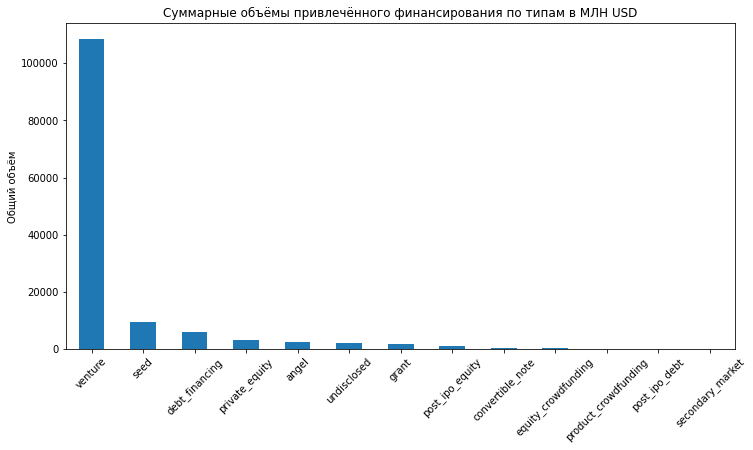

In [52]:
plt.figure(figsize=(12,6))
total_amounts.plot(kind='bar')
plt.title('Суммарные объёмы привлечённого финансирования по типам в МЛН USD')
plt.ylabel('Общий объём')
plt.xticks(rotation=45)
plt.show()

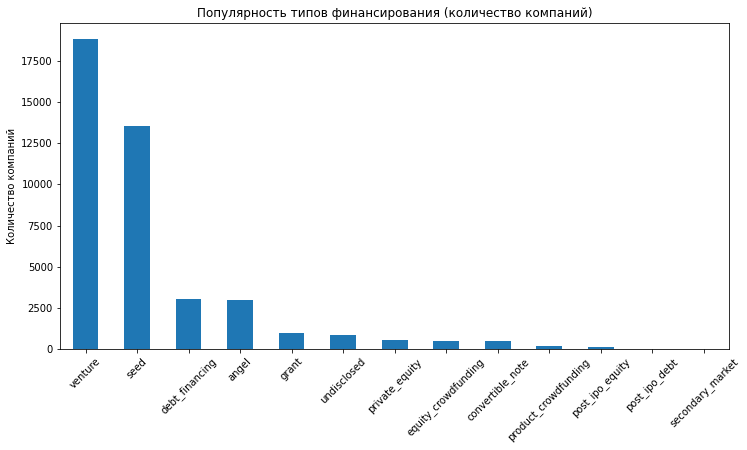

In [53]:
plt.figure(figsize=(12,6))
usage_counts.plot(kind='bar')
plt.title('Популярность типов финансирования (количество компаний)')
plt.ylabel('Количество компаний')
plt.xticks(rotation=45)
plt.show()

In [54]:
comparison = pd.DataFrame({
    'Сумма_инвестиций': total_amounts,
    'Количество': usage_counts
})
comparison['Средний_чек'] = comparison['Сумма_инвестиций'] / comparison['Количество']
comparison.sort_values('Средний_чек', ascending=False, inplace=True)
comparison

,Сумма_инвестиций,Количество,Средний_чек
post_ipo_equity,1097.385049,142,7.728064
post_ipo_debt,169.809099,24,7.075379
secondary_market,45.285796,7,6.469399
venture,108592.238635,18840,5.763919
private_equity,3208.555805,589,5.447463
undisclosed,2312.439051,840,2.752904
debt_financing,5887.386251,3077,1.913353
grant,1900.236113,1001,1.898338
product_crowdfunding,212.935639,208,1.023729
convertible_note,500.481107,509,0.983263


**Встречаются редко, но характеризуются значительным объёмом предоставленных сумм: post_ipo_equity, post_ipo_debt, secondary_market - Тройка лидеров по среднему чеку инвестиций.**

**Часто используемые типы финансирования, которые характеризуются небольшими объёмами: angel, seed, equity_crowdfunding**

In [55]:
return_cols = [
    'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note',
    'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
    'post_ipo_debt', 'secondary_market', 'product_crowdfunding'
]

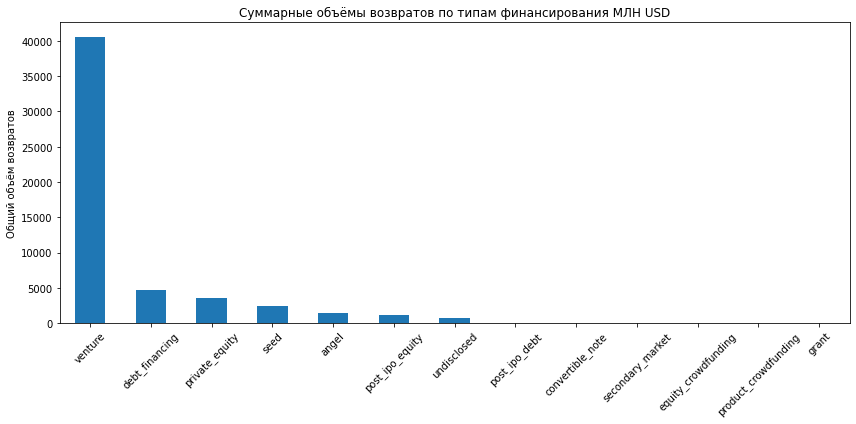

In [56]:
total_returns = df_returns[return_cols].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
total_returns.plot(kind='bar')

plt.title('Суммарные объёмы возвратов по типам финансирования МЛН USD')
plt.ylabel('Общий объём возвратов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [57]:
total = pd.concat([total_returns, total_amounts], axis=1, keys=['Сумма возвратов', 'Сумма инвестиций'])
total['share'] = (total['Сумма возвратов']/total['Сумма инвестиций']).round(2)
total = total.sort_values(by = 'share',ascending=False)

In [58]:
html_str = """
<div style="display:flex; justify-content:space-between;">
  <div style="width:48%;"><h4>Отношения сумм Возвратов к Инвестициям</h4>{}</div>
  <div style="width:48%;"><h4>Средний чек инвестиций</h4>{}</div>
</div>
""".format(total.to_html(), comparison.to_html())

display(HTML(html_str))

,Сумма возвратов,Сумма инвестиций,share
private_equity,3587.33,3208.555805,1.12
post_ipo_equity,1104.96,1097.385049,1.01
debt_financing,4734.85,5887.386251,0.80
angel,1509.23,2645.640807,0.57
post_ipo_debt,91.03,169.809099,0.54
venture,40578.62,108592.238635,0.37
undisclosed,730.88,2312.439051,0.32
seed,2382.24,9658.114122,0.25
secondary_market,5.20,45.285796,0.11
convertible_note,34.79,500.481107,0.07


**Venture и Seed оба в 5-6 раз популярнее остальных типов инвестиций. Venture является абсолютным лидером и по объёмам привлечённого финансирования, и по объёмам возвратов.
Однако его рейтинг в таблице "Отношения сумм Возвратов к Инвестициям" для меня еще раз подтверждает: шансы получить возврат 50/50 и ниже. Seed - много инвесторов, малая доля возвратов, малый объем инвестиций.**

**debt_financing - популярен (3 место), большой объем возвратов и инвестиций, также доля возвратов высока.**

**Стоит рассмотреть: private_equity, post_ipo_equity, debt_financing**

<a class="anchor" id="4-bullet"></a>
## Шаг 4. Анализ динамики

### 4.1 Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитаем для каждой компании средний объём одного раунда финансирования.

In [59]:
df_final['avg_round'] = df_final['funding_total_usd'] / df_final['funding_rounds']
median_usd_in_year = df_final.groupby(df_final['mid_funding_at'].dt.year)['avg_round'].median() # Возьмем медиану как типичное значение

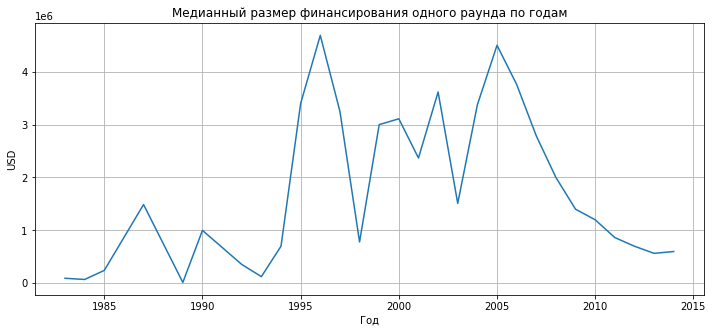

In [60]:
plt.figure(figsize=(12,5))
median_usd_in_year.plot()
plt.title('Медианный размер финансирования одного раунда по годам')
plt.ylabel('USD')
plt.xlabel('Год')
plt.grid(True)
plt.show()

In [61]:
rounds_year = df_final.groupby(df_final['mid_funding_at'].dt.year)['funding_rounds'].sum()

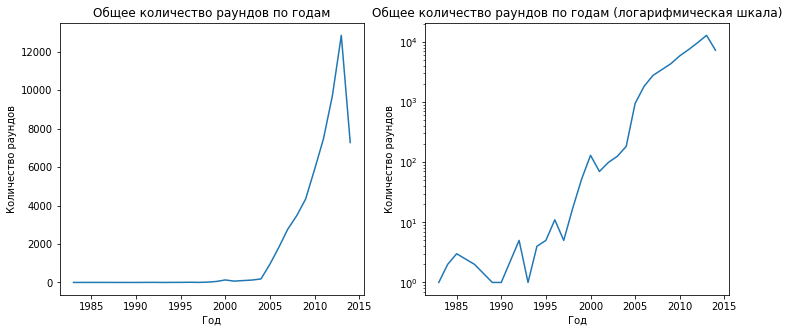

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(rounds_year)
ax1.set_title('Общее количество раундов по годам')
ax1.set_ylabel('Количество раундов')
ax1.set_xlabel('Год')

ax2.plot(rounds_year)
ax2.set_title('Общее количество раундов по годам (логарифмическая шкала)')
ax2.set_ylabel('Количество раундов')
ax2.set_xlabel('Год')
ax2.set_yscale('log')

plt.show()

**В 1996 году был максимальный размер средств, собранных в рамках одного раунда.**

**2014 год попал в общий убывающий тренд размера финансирования одного раунда, начавшийся в 2005 году. Но виден небольшой рост относитиельно 2013 года. Это может быть связано с резким падением на ~5000 количества раундов в году.**

**Общая оценка 2014 года: Спад финансирования**

### 4.2 Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составим сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка.

In [63]:
# Оставим только массовые сегменты
df_mass = df_final[~df_final['market'].isin(['mid', 'niche'])].copy()

In [64]:
# Сводная таблица, суммируем funding_total_usd
pivot = df_mass.pivot_table(
    index=df_mass['mid_funding_at'].dt.year,
    columns='market',
    values='funding_total_usd',
    aggfunc='sum'
)
pivot

market,Advertising,Analytics,Apps,Automotive,Big Data,Biotechnology,Clean Technology,Cloud Computing,Consulting,Curated Web,Design,E-Commerce,Education,Enterprise Software,Entertainment,Fashion,Finance,Games,Hardware + Software,Health Care,Health and Wellness,Hospitality,Internet,Manufacturing,Marketplaces,Medical,Messaging,Mobile,Music,Networking,News,Nonprofits,Photography,Public Relations,Real Estate,SaaS,Search,Security,Semiconductors,Social Media,Social Network Media,Software,Sports,Startups,Technology,Travel,Video,Web Hosting
mid_funding_at,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.500000e+06,NaN,NaN,NaN,NaN,NaN,NaN
1989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+07,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,400000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3350000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.400000e+05,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24120000.0,NaN,NaN,NaN,NaN,10038299.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# Оставили сегменты которые выросли по сравнению с 2013 годом
growing_segments_2014 = pivot.columns[(pivot.loc[2014] > pivot.loc[2013])]
growing_segments_2014

Index(['Apps', 'Internet', 'Medical', 'Nonprofits', 'Real Estate', 'SaaS',
       'Sports', 'Startups', 'Technology', 'Video'],
      dtype='object', name='market')

In [66]:
pivot_growing = pivot[growing_segments_2014]

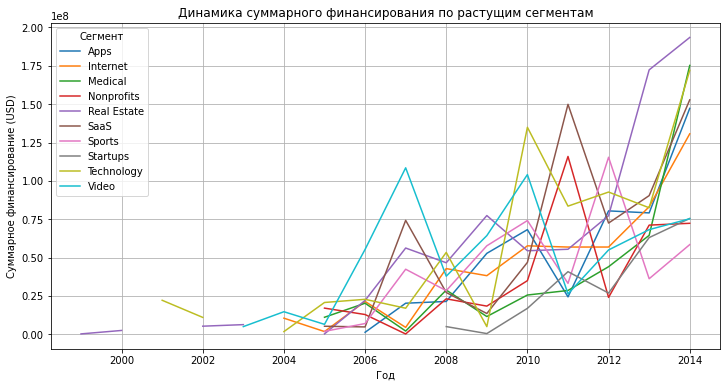

In [67]:
pivot_growing.plot(figsize=(12,6))

plt.title('Динамика суммарного финансирования по растущим сегментам')
plt.ylabel('Суммарное финансирование (USD)')
plt.xlabel('Год')
plt.grid(True)
plt.legend(title='Сегмент')
plt.show()

**Почти линейный роост у Internet, без скачков по сравнению с остальными.**

**Сильный растущий тренд у Real Estate и Medical в 2014.**

**2014 год формирует сильный скачек финансирования для многих сегментов: Apps, Medical, Tecnology, Real Estate, Internet.**

### 4.3 Годовая динамика доли возвращённых средств по типам финансирования

Для каждого года и каждого вида финансирования рассчитаем нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, нужно заменить на пропуски.

In [68]:
# Cумма финансирования по годам
fund_by_year = df_final.groupby(df_final['mid_funding_at'].dt.year)[funding_cols].sum()
# Создаем новый датафрейм на основе df_returns, где индекс = году значение = сумме возвращенных средств
ret_by_year = df_returns.apply(np.sum,axis=1)
ret_by_year = pd.DataFrame({'Год':ret_by_year.index, 'Сумма':ret_by_year.values})

In [69]:
merged = fund_by_year.join(df_returns, lsuffix='_fund', rsuffix='_ret')

In [70]:
eps = 1e-60
ratios = pd.DataFrame()

for col in funding_cols:
    ratios[col] = merged[f"{col}_ret"] / (merged[f"{col}_fund"] + eps)

In [71]:
# Отбрасывает отрицательный возврат и возврат больше 150%
ratios = ratios.mask((ratios > 1.5) | (ratios < 0))

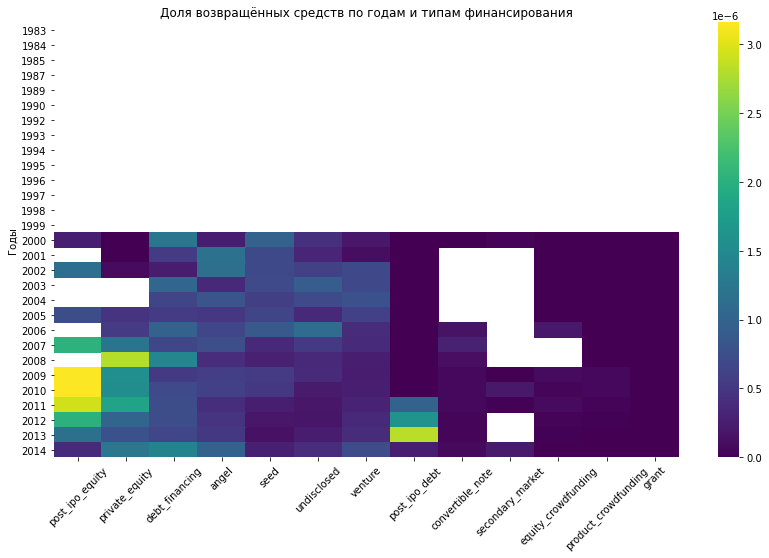

In [72]:
# Сортируем по "удачным" сегментам (желтое слева, фиолетовое справа)
category_order = ratios.mean(axis=0).sort_values(ascending=False).index
ratios = ratios[category_order]

plt.figure(figsize=(14,8))
sns.heatmap(ratios, annot=False, cmap='viridis')
plt.title('Доля возвращённых средств по годам и типам финансирования')
plt.ylabel('Годы')
plt.xticks(rotation=45)
plt.show()

Построем график, на котором отобразим нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

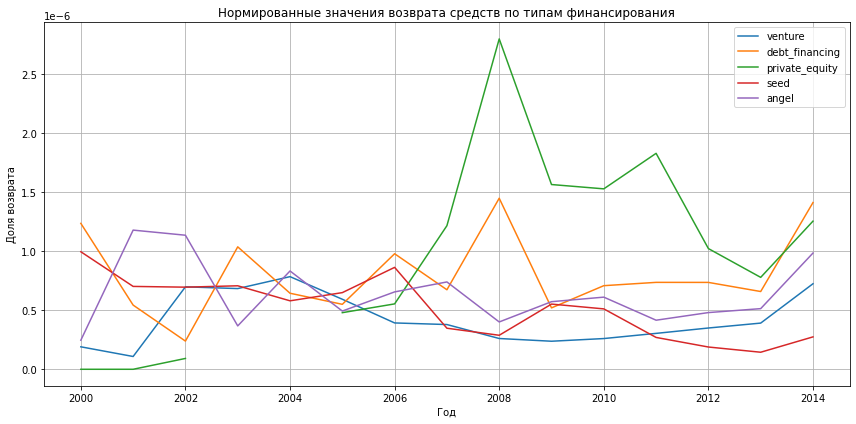

In [73]:
cols = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

plt.figure(figsize=(12,6))

for col in cols:
    plt.plot(ratios.index, ratios[col], label=col)

plt.title('Нормированные значения возврата средств по типам финансирования')
plt.xlabel('Год')
plt.ylabel('Доля возврата')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

**Private equity - демонстрирует самый резкий всплеск в районе 2008 года, после чего происходит снижение, но значения остаются относительно высокими по сравнению с другими типами.**

**Debt financing - характеризуется высокой волатильностью, частыми пиками и спадами. Но на 2014 год обогнала победителя многоих лет Private equity.**

**Venture - показывает умеренный но стабильный рост на протяжении 2009–2014.**

<a class="anchor" id="5-bullet"></a>
## Шаг 5. Итоговый вывод и рекомендации

**Рекомендации:**

Наиболее стабильный возврат средств стоит ожидать от типов финансирования: *post_ipo_equity, private_equity, debt_financing. private_equity и post_ipo_equity немного обгоняют debt_financing*

Тип *Venture* - буквально занимает золотую середину. Что не сильно отличает его от казино. Стоит прбовать, только имея качественную и достоверную информацию о компании и ее сегменте от профессионалов. Не стоит делать больших вложений опираясь на локальную популярность технологии. Крупные вложения не гарантируют прибыли (коэффициент 0.37)

Ранние стадии финансирования харатеризуются большим числом сделок, но низкой окупаемостью.


Сегмент *Internet* показывает стабильный рост на протяжении рассматриваемого периода, без сильных скачков. Подходит для консервативных или умеренно-агрессивных инвесторов.

У сегментов *Real Estate, Medical* резкий рост, но тренд еще не закрепился. Это более рисковые вложения.


Также наблюдается тенденция на уменьшения объема одного раунда финансирования, но увеличение количества раундов (постепенное влиание денег в компании)

**Итоги проекта:**

Проведена предварительная очистка и подготовка данных: обработаны пропуски, типы дат, а также рассчитаны группировки по сегментам и видам финансирования.

Сегменты рынка были разделены на массовые, средние и нишевые в зависимости от количества компаний.

С помощью метода IQR определены и удалены компании с аномально высоким объёмом финансирования.

Проведён анализ активности рынка по годам: рассчитано количество раундов и средний объём одного раунда.

Выполнено сравнение динамики финансирования по сегментам и выявлены сегменты с устойчивым ростом.

На основании данных о возвратах средств рассчитаны нормированные значения по каждому типу финансирования, удалены аномальные выбросы и визуализированы результаты.

Выводы соотносятся между собой: рост количества раундов при снижении их объёма согласуется с тенденцией к снижению риска и повышению избирательности инвесторов (на это могло повлиять и увеличение компаний на рынке, выбор, куда вложиться, постоянно растет). 

Сегменты, где наблюдается стабильность (Internet, debt, private equity), демонстрируют ту же осторожную стратегию.
Некоторые направления (Medical и Real Estate) требуют дальнейшего наблюдения. Их поведение пока напоминает краткосрочные всплески.